# Relatorio de Dados Sobre Venda de Jogos

**importando as bibliotecas que vão ser usadas**

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

**Lendo o dataset e fazendo a classificação dos dados**

In [97]:
df = pd.read_csv("vgsales.csv", encoding='ISO-8859-1')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


**Proporção de linhas e colunas e outras informações**

In [98]:
print("Linhas e colunas", df.shape)
df.info()

Linhas e colunas (16598, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Retirando os elementos nulos presentes no DataFrame**

In [99]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [100]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


**Criação da tabela de frequência absoluta e relativa para a coluna "Gênero"**

Analizando os dados das frequências abaixo percebe-se que os **jogos mais frequentes** entre as produtoras, na amostra, foram os de **ação** com **3316** ocorrências. Isso já deixa mais claro a **tendência dos jogadores** por esses titulos. **O segundo** mais frequente fica com os de **esportes** se destacando com com **2346** ocorrências entre as produtoras.

In [101]:
freqA =  df.Genre.value_counts()
print("Frequência Absoluta:", freqA)
freqR =  df.Genre.value_counts(normalize = True)
print("Frequência Relativa:", freqR)

Frequência Absoluta: Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64
Frequência Relativa: Genre
Action          0.199558
Sports          0.141428
Misc            0.103493
Role-Playing    0.090234
Shooter         0.078694
Adventure       0.078203
Racing          0.075195
Platform        0.053711
Simulation      0.052053
Fighting        0.051317
Strategy        0.041127
Puzzle          0.034989
Name: proportion, dtype: float64


**Criando um gráfico de pizza para demontras as frequencias acima**

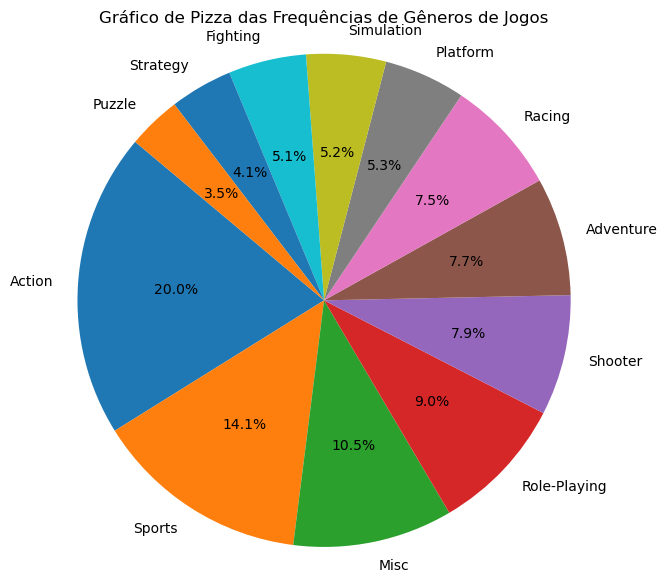

In [102]:
generos = ['Action', 'Sports', 'Misc', 'Role-Playing', 'Shooter', 'Adventure', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Strategy', 'Puzzle']
freqAbsoluta = [3316, 2346, 1739, 1488, 1310, 1286, 1249, 886, 867, 848, 681, 582]
plt.figure(figsize=(7, 7))
plt.pie(freqAbsoluta, labels=generos, autopct='%1.1f%%', startangle=140)
plt.title('Gráfico de Pizza das Frequências de Gêneros de Jogos')
plt.axis('equal')
plt.show()


**Comprando os genêneros com as vendas**

Dando enfase nas proporções acima e, com base em uma amostra de 500 elementos retirada do DataFrame, onde compara os generos e a soma das vendas globais. Portanto, o que se destaca no numero de vendas é, também, o gênero de ação com 563 milhoes de copias vendidas, isso confirma o porque as produtoras optarem por esses títulos, justamente por venderem mais.

In [103]:
dfamostra = df.iloc[0:500,[4,10]]
soma_vendas_por_genero = dfamostra.groupby('Genre')['Global_Sales'].sum().reset_index()
soma_vendas_por_genero

,Genre,Global_Sales
0,Action,559.83
1,Adventure,38.79
2,Fighting,108.56
3,Misc,268.49
4,Platform,433.80
5,Puzzle,87.62
6,Racing,256.26
7,Role-Playing,398.94
8,Shooter,492.89
9,Simulation,114.53


**Representando os valores em um gráfico de barras**

<Axes: xlabel='Genre'>

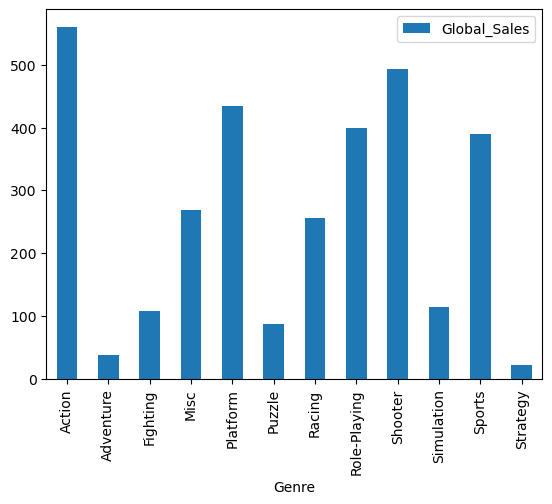

In [104]:
soma_vendas_por_genero.plot.bar(x = "Genre", y = "Global_Sales")

**Traçando as frequências absolutas e relativas para a coluna dos anos de lançamento**

In [105]:
print("Frequência Absoluta:", df.Year.value_counts())
print("Frequência Relativa:", df.Year.value_counts(normalize = True))

Frequência Absoluta: Year
2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64
Frequência Relativa: Year
2009.0    0.087840
2008.0    0.087656
2010.0    0.077159
2007.0    0.073722
2011.0    0.069732
2006.0    0.061875
2005.0    0.057455
2002.0    0.050887
2003.0    0.047572
2004.0    0.045669
2012.0    0.040206
2015.0    0.037690
2014.0    0.035602
2013.0    0.033515
2001.0    0.029587
1998.0    0.023264
2000.0    0.021423
2016.0    0.02

**Sobre as frequências**

Evidenciando os dados acima na forma de um histograma que varia de acordo com a frequência. Ele deixa mais visivel as epocas que mais se destacaram no lançamento de jogos, até onde os dados do DataFrame vão. Nesse exemplo foram usadas **40 faixas** para facilitar o entendimento.

<Axes: >

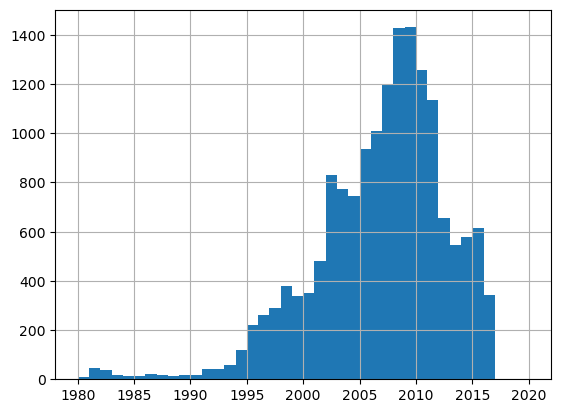

In [106]:
df.Year.hist(bins = 40)

**Comparando os histogramas**

Já esse outro histograma abaixo relaciona os anos de lançamento com a quantidades de vendas globais arrecadadas nesses períodos de tempo. Portanto, se for feita uma leve comparação entre os dois histogramas é possivel traçar uma logíca básica, onde o primeiro que utiliza a frequencia dos lançamentos por ano é muito semelhante ao segundo, isso porque se um determinado ano teve muitos lançamentos consequentemente as vendas globais tambem vão ser maiores, como é o caso da primeira década dos anos 2000 em que teve um boom dos lançamentos e venda de jogos.

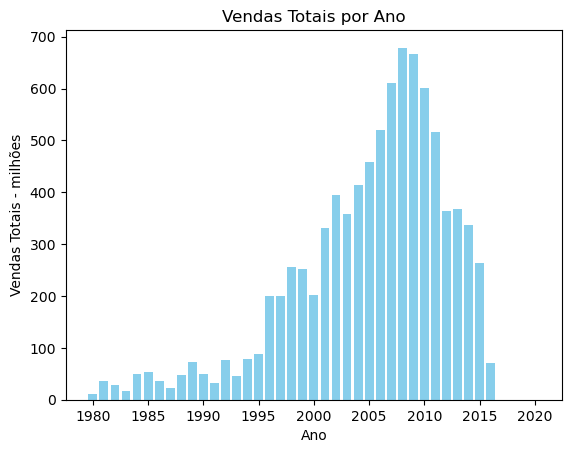

In [107]:
vendas_por_ano = df.groupby('Year')['Global_Sales'].sum()
plt.bar(vendas_por_ano.index, vendas_por_ano.values, color='skyblue')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais - milhões')
plt.title('Vendas Totais por Ano')
plt.show()

**Implementação de um gráfico de linha a partir do histograma acima**

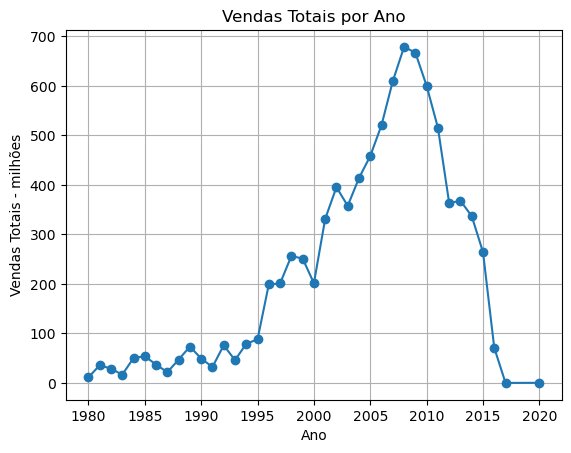

In [108]:
plt.plot(vendas_por_ano.index, vendas_por_ano.values, marker='o', linestyle='-')

plt.xlabel('Ano')
plt.ylabel('Vendas Totais - milhões')
plt.title('Vendas Totais por Ano')

plt.grid(True)
plt.show()

**Aprofundando um pouco mais no DataFrame**

 Tentando entender mais sobre esse **montante de dados**, eu decidi dividir ele em **dois**. Para isso, eu criei um dataset menor contendo apenas as colunas dos **anos de lançamento** e as **produtoras**, então eu categorizei os **anos em ordem** e dividi em dois montante de dados. O **primeiro** contendo os dados referente aos **anos menores que 2000**, e no outro os maiores. Nesse quesito, decidi classificar esses dados, onde eu peguei as **quatro maiores frequencia** das produtoras de ambos, ou seja, para ter noção do **crescimento** e grandiosidade de lançamentos que as produtoras foram tendo com o passar dos anos. Portanto, criei **dois gráficos** de pizza para demonstrar isso, e foi possivel notar que nas **decadas de 80 e 90** o pódio era da **nintendo** onde ganhou muita notoriedade com os **consoles da epoca**. Já nos anos **2000 em diante**, da pra notar a ascençao de empresas como **EA, Ubisoft e Activision** nos seus anos de ouro dos lançamento de jogos.

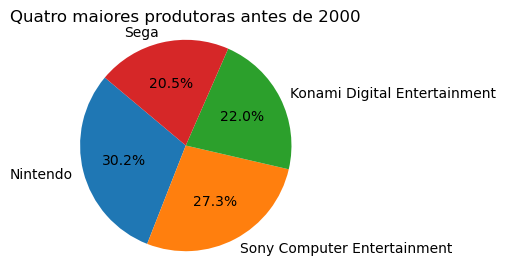

In [109]:
dfresumo = df[['Year','Publisher']]
dfresumo = dfresumo.sort_values(by = "Year")
dfmenor2000 = dfresumo[dfresumo.Year < 2000]

frequencias1 = dfmenor2000['Publisher'].value_counts()

quatro_maiores_editoras1 = frequencias1.nlargest(4).index

df_quatro_maiores1 = dfmenor2000[dfmenor2000['Publisher'].isin(quatro_maiores_editoras1)]

frequencias_quatro_maiores1 = df_quatro_maiores1['Publisher'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(frequencias_quatro_maiores1, labels=frequencias_quatro_maiores1.index, autopct='%1.1f%%', startangle=140)
plt.title('Quatro maiores produtoras antes de 2000')
plt.axis('equal')
plt.show()

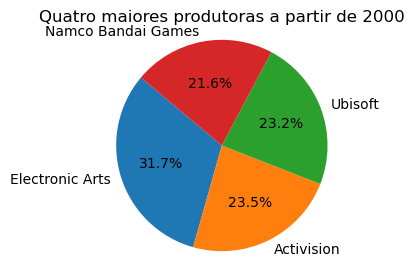

In [110]:
dfmaior2000 = dfresumo[dfresumo.Year >= 2000]
frequencias2 = dfmaior2000['Publisher'].value_counts()

quatro_maiores_editoras2 = frequencias2.nlargest(4).index

df_quatro_maiores2 = dfmaior2000[dfmaior2000['Publisher'].isin(quatro_maiores_editoras2)]

frequencias_quatro_maiores2 = df_quatro_maiores2['Publisher'].value_counts()

plt.figure(figsize=(3, 3))
plt.pie(frequencias_quatro_maiores2, labels=frequencias_quatro_maiores2.index, autopct='%1.1f%%', startangle=140)
plt.title('Quatro maiores produtoras a partir de 2000')
plt.axis('equal')
plt.show()

**Algumas estatisticas a mais sobre o DataFrame**

Analisando as frequencias dos consoles com mais jogos lançados, eu decidi pegar o PS2 ,que foi um que mais teve titulos e que é aclamado por muitos um dos melhores, para observar a relaçao do console com o numero de vendas globais.

In [95]:
df.Platform.value_counts()

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

**Criando um DataFrame só com os dados do PS2 e de suas vendas globais**

In [91]:
dfPS2 = df[['Platform','Global_Sales']]
dfPS2 = dfPS2[df.Platform == 'PS2']
dfPS2

,Platform,Global_Sales
17,PS2,20.81
24,PS2,16.15
28,PS2,14.98
38,PS2,13.10
47,PS2,11.66
...,...,...
16559,PS2,0.01
16561,PS2,0.01
16572,PS2,0.01
16580,PS2,0.01


**Nesse DataFrame eu peguei todas as vendas que o PS2 teve com jogos e calculei a media, mediana e moda desses dados**

Como as vendas estão em milhões e, o PS2 tambem teve muitos games lançados, nota-se que a media distancia um pouco, justamente por alguns jogos terem um numero de vendas muito distante de outros. Nessas medidas, da pra ver tambem que a moda, que corresponde ao valor que mais se repete, consta com 0.02, que equivale a 20.000 copias vendidas globalmente, isso significa que a maioria dos jogos lançados para esse console tem 20 mil ou mais copias vendidas.

In [94]:
media = dfPS2['Global_Sales'].mean()
mediana = np.median(dfPS2['Global_Sales'])
moda = stats.mode(dfPS2['Global_Sales'])
print("Media : ", media)
print("Mediana : ", mediana)
print("Moda : ", moda[0])

Media :  0.5799059708509638
Mediana :  0.23
Moda :  0.02
